## Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample. Interpret the results. Write the inference/analysis of each output.

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv("play_tennis.csv")

df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [7]:
# encoding required because every variable is categorical 
X = pd.get_dummies(df.drop("Play Tennis", axis=1))
y = df["Play Tennis"]

In [9]:
model = DecisionTreeClassifier(criterion="entropy")

model.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Text(0.5, 1.0, 'Decision Tree - ID3 for Play Tennis Dataset')

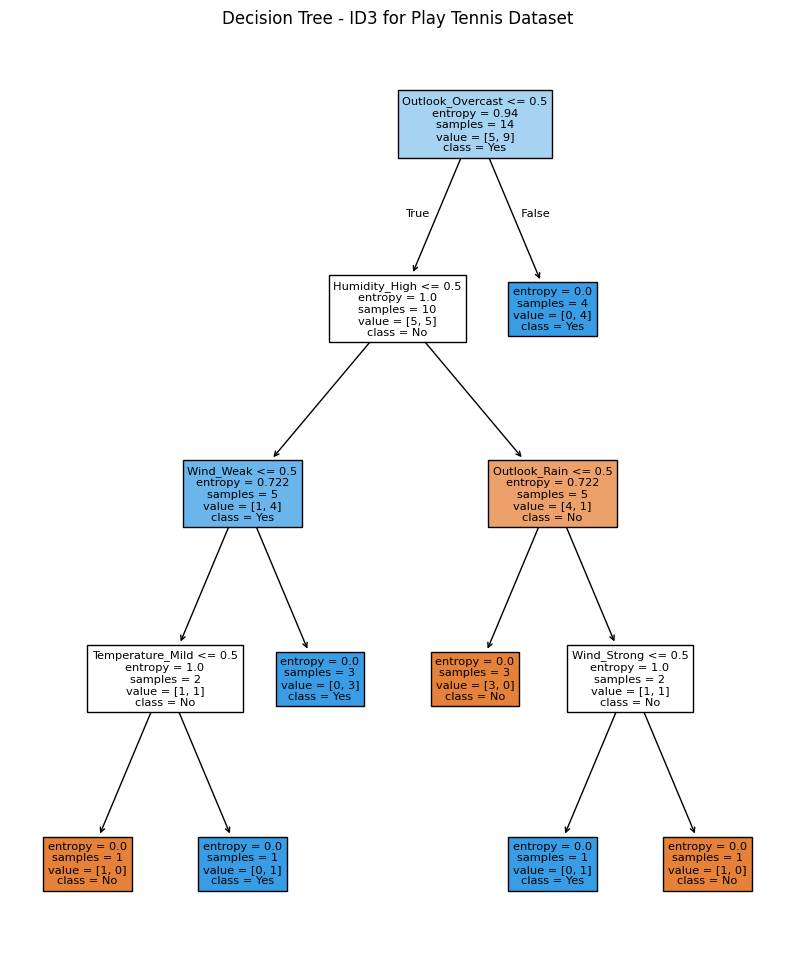

In [18]:
plt.figure(figsize=(10, 12))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree - ID3 for Play Tennis Dataset")

In [22]:
sample = {
    'Outlook': 'Overcast',
    'Temperature': 'Hot',
    'Humidity': 'High',
    'Wind': 'Weak'
}

In [26]:
sample_df = pd.DataFrame([sample])
sample_encoded = pd.get_dummies(sample_df)
sample_encoded = sample_encoded.reindex(fill_value=0, columns=X.columns)

prediction = model.predict(sample_encoded)

print(f"Prediction for an Overcast, Hot, Humid and Weak-winded day: {prediction[0]}")

Prediction for an Overcast, Hot, Humid and Weak-winded day: Yes
